# Importing all libraries 

In [48]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from scipy import stats



In [49]:
# Importing csv file of data 

df = pd.read_csv("H:\\Profesional books\\Data Science Course\\Dcoder\\Data Sets\\train.csv")



In [50]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

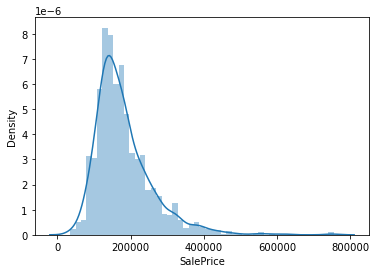

In [52]:
House_Sales_Price  = sns.distplot(df["SalePrice"])

Data Cleaning


In [53]:
total=df.isnull().sum().sort_values(ascending=False)

In [54]:

total

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [55]:
percent=df.isnull().sum()/df.shape[0]

In [56]:
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])

In [57]:

missing_data.head(20).sort_index()

,Total,Percent
Alley,1369,0.937671
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtFinType2,38,0.026027
BsmtQual,37,0.025342
Electrical,1,0.000685
Fence,1179,0.807534
FireplaceQu,690,0.472603
GarageCond,81,0.055479


In [58]:
null_has_meaning=["Alley","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
                 "BsmtQual","Fence","FireplaceQu","GarageCond","GarageFinish","GarageQual","GarageType","PoolQC","MiscFeature"]

In [59]:
for i in null_has_meaning:
    df[i].fillna("None",inplace=True)

In [60]:
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum()/df.shape[0]
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data.head(20)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


In [61]:
df.drop("LotFrontage",axis=1,inplace=True)

In [62]:
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 80, dtype: object

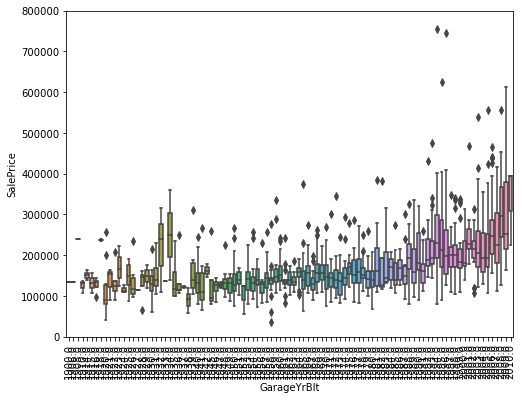

In [63]:
var="GarageYrBlt"
data=pd.concat([df["SalePrice"],df[var]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)
plt.show()


In [64]:
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum()/df.shape[0]
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data.head(20)

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
ExterQual,0,0.000000


In [65]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(),inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(),inplace=True)
df["MasVnrType"].fillna("None",inplace=True)

In [66]:
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum()/df.shape[0]
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data.head(20)

,Total,Percent
Electrical,1,0.000685
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
MasVnrArea,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000


In [67]:
df.dropna(inplace=True)

In [68]:

total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum()/df.shape[0]
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


In [69]:
types_train=df.dtypes
num_train=types_train[(types_train=="int64") | (types_train==float)]

In [70]:
cat_train=types_train[(types_train==object)]

In [71]:

pd.DataFrame(types_train)[0].value_counts()

object     43
int64      35
float64     2
Name: 0, dtype: int64

In [72]:
num_train

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [73]:
numerical_values_train=list(num_train.index)

In [74]:
num_train

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [75]:
numerical_values_train


['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [76]:

categorical_values_train=list(cat_train.index)
categorical_values_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

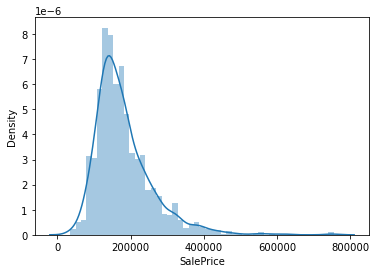

In [77]:
Saleprice_displot = sns.distplot(df["SalePrice"])

Saleprice_displot

plt.show()

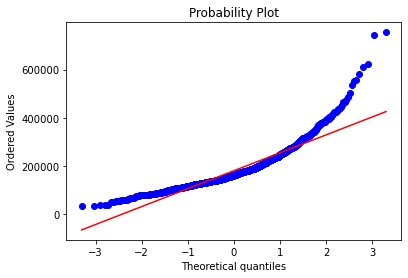

skewness: 1.881943
kurtosis: 6.529263


In [78]:
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()
print("skewness: %f" % df['SalePrice'].skew())
print("kurtosis: %f" % df['SalePrice'].kurt())

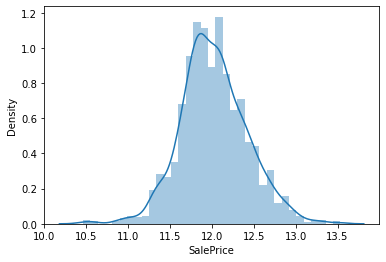

In [79]:
_=sns.distplot(np.log(df["SalePrice"]))

In [80]:
df["TransformedPrice"]=np.log(df["SalePrice"])

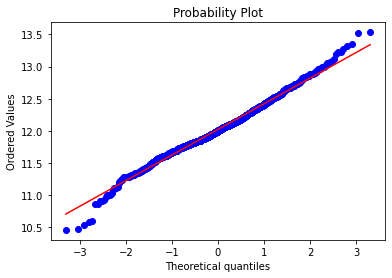

skewness: 0.121318
kurtosis: 0.806928


In [81]:
fig = plt.figure()
res = stats.probplot(df['TransformedPrice'], plot=plt)
plt.show()
print("skewness: %f" % df['TransformedPrice'].skew())
print("kurtosis: %f" % df['TransformedPrice'].kurt())

Exploring the variables

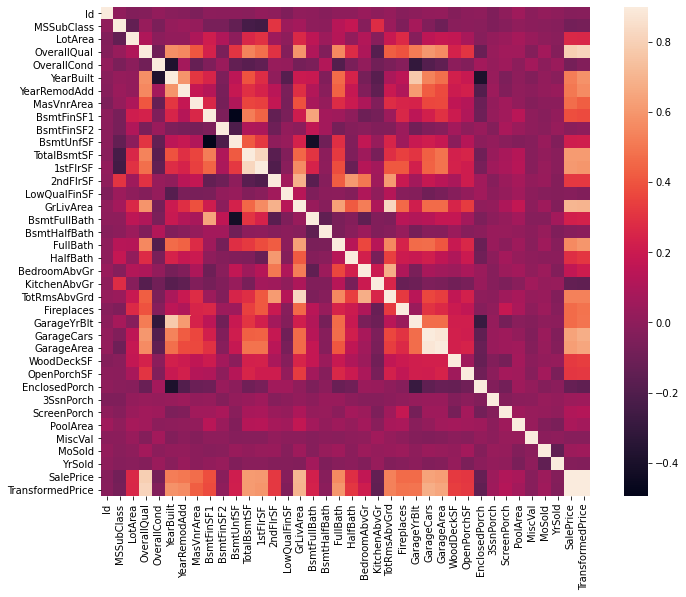

In [82]:
#correration matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=0.9, square=True)
plt.show();

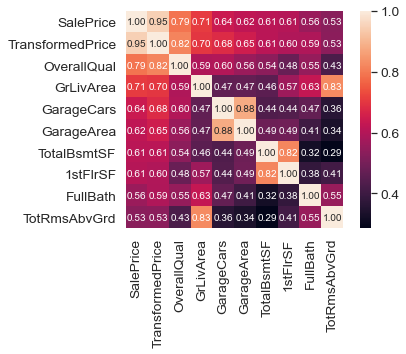

In [84]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


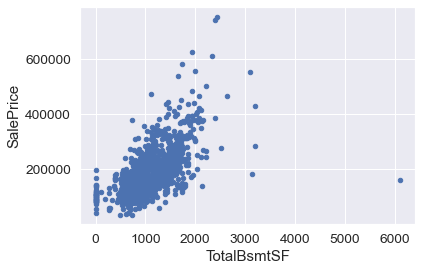

In [85]:
var ='TotalBsmtSF'
data = pd.concat([df['SalePrice'],df[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim =0.800000)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


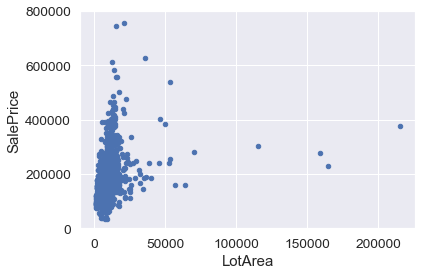

In [86]:

#scatter plot LotArea/salePrice
var = 'LotArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x= var, y='SalePrice', ylim =(0,800000))
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


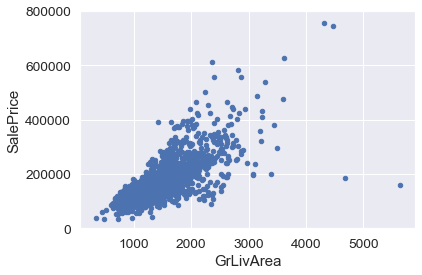

In [87]:
#scatter plot GrLivArea/salePrice
var ='GrLivArea'
data =pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


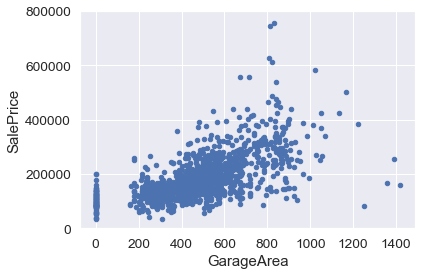

In [88]:
#scatter plot GarageArea/SalePrice
var = 'GarageArea'
data =pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var,y='SalePrice', ylim= (0,800000));
plt.show()

Relation exploration for categorical features

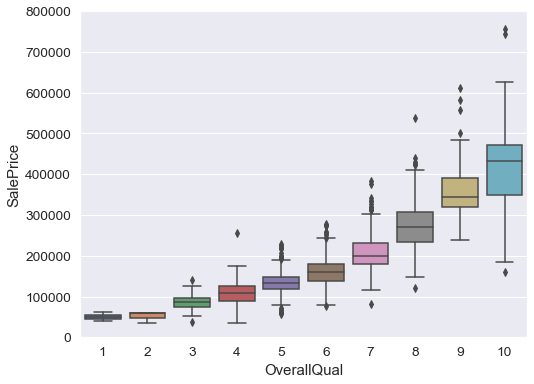

In [89]:

#box plot overallqual/salePrice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax =plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

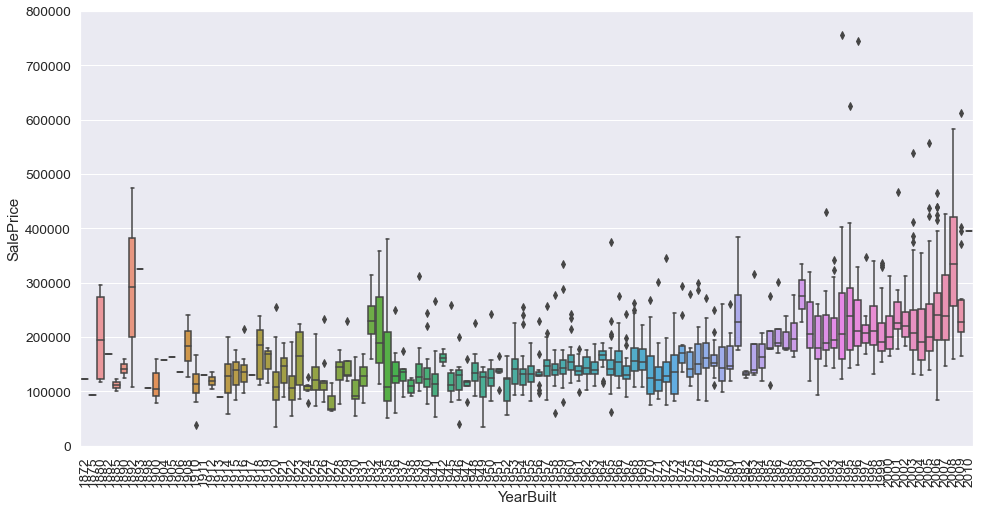

In [90]:
#year built
var  = 'YearBuilt'
data= pd.concat([df['SalePrice'], df[var]], axis =1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);
plt.show();

In [91]:
categorical_values_train


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [92]:
df["MSZoning"].value_counts()

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [93]:
df[categorical_values_train]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal


In [94]:

set(df["MSZoning"])

{'C (all)', 'FV', 'RH', 'RL', 'RM'}

In [95]:
for i in categorical_values_train:
    feature_set=set(df[i])
    for j in feature_set:
        feature_list=list(feature_set)
        df.loc[df[i]==j,i]=feature_list.index(j)

In [96]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,1,8450,0,0,3,2,1,4,...,0,3,2,0,2,2008,0,0,208500,12.247694
1,2,20,1,9600,0,0,3,2,1,2,...,0,3,2,0,5,2007,0,0,181500,12.109011
2,3,60,1,11250,0,0,1,2,1,4,...,0,3,2,0,9,2008,0,0,223500,12.317167
3,4,70,1,9550,0,0,1,2,1,1,...,0,3,2,0,2,2006,0,2,140000,11.849398
4,5,60,1,14260,0,0,1,2,1,2,...,0,3,2,0,12,2008,0,0,250000,12.429216


Spliting the data into test and train

In [98]:
X=df.drop(["Id","SalePrice","TransformedPrice"],axis=1)

In [100]:

y=df["TransformedPrice"]

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

Model building

In [103]:
params={"alpha":[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}

In [104]:

#validation function
n_folds = 5

def RMSLE_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error",
cv = kf))
    return(rmse)

Lasso Regression

In [105]:

lasso=Lasso()
folds=5
model_cv=GridSearchCV(estimator=lasso,
                     param_grid=params,scoring="neg_mean_absolute_error",
                      return_train_score=True,
                     cv=folds,verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
cv_results=pd.DataFrame(model_cv.cv_results_)

In [107]:

cv_results["param_alpha"]=cv_results["param_alpha"].astype("float32")

In [108]:
cv_results.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha           float32
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

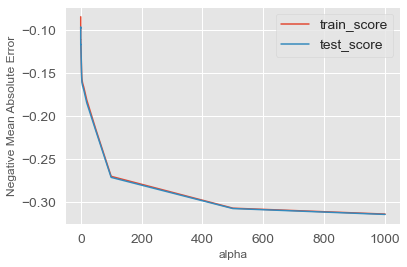

In [109]:

plt.style.use("ggplot")
plt.plot(cv_results["param_alpha"],cv_results["mean_train_score"])
plt.plot(cv_results["param_alpha"],cv_results["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("Negative Mean Absolute Error")
plt.legend(["train_score","test_score"],loc="upper right")
plt.show()

In [110]:
alpha=10
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=10)

In [111]:
ridge=Ridge()
folds=5
model_cv=GridSearchCV(estimator=ridge,
                     param_grid=params,scoring="neg_mean_absolute_error",
                      return_train_score=True,
                     cv=folds,verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
cv_results=pd.DataFrame(model_cv.cv_results_)

In [113]:
cv_results.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha            object
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

In [115]:
cv_results["param_alpha"]=cv_results["param_alpha"].astype("float32")

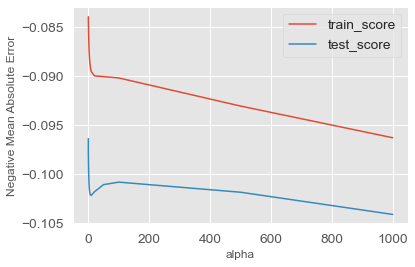

In [116]:

plt.style.use("ggplot")
plt.plot(cv_results["param_alpha"],cv_results["mean_train_score"])
plt.plot(cv_results["param_alpha"],cv_results["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("Negative Mean Absolute Error")
plt.legend(["train_score","test_score"],loc="upper right")
plt.show()

In [117]:
alpha=50
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

Ridge(alpha=50)

Gradient Boosting Regressor

In [118]:
GBoost=GradientBoostingRegressor()
folds=5
model_cv=GridSearchCV(estimator=GBoost,
                     param_grid=params,scoring="neg_mean_absolute_error",
                      return_train_score=True,
                     cv=folds,verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   54.3s finished


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [119]:
cv_results=pd.DataFrame(model_cv.cv_results_)

In [120]:
cv_results.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha            object
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

In [121]:

cv_results["param_alpha"]=cv_results["param_alpha"].astype("float32")

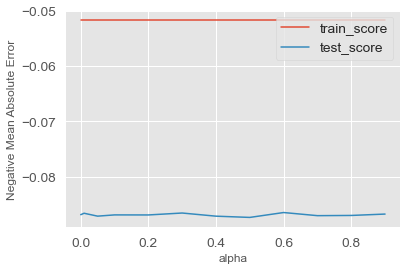

In [122]:
plt.style.use("ggplot")
plt.plot(cv_results["param_alpha"],cv_results["mean_train_score"])
plt.plot(cv_results["param_alpha"],cv_results["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("Negative Mean Absolute Error")
plt.legend(["train_score","test_score"],loc="upper right")
plt.show()

In [123]:
GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000,
                                   min_samples_split=10, min_samples_leaf=15,max_depth=4,
                                   random_state=5,max_features='sqrt', alpha=0.6)
GBoost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.6, learning_rate=0.05, loss='huber',
                          max_depth=4, max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

In [124]:

GBoost.score(X_test,y_test)

0.8861432686431174

Scores from the above models

In [127]:

#Lasso
score = RMSLE_cv(lasso)
print ("\n Lasso score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

#Ridge
score = RMSLE_cv(ridge)
print ("\n Ridge score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

#Gradient Boosting Regression
score = RMSLE_cv(GBoost)
print ("\n GBoost score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))


 Lasso score: 0.2465 (0.0456)


 Ridge score: 0.1693 (0.0323)


 GBoost score: 0.1212 (0.0198)



In [128]:
print("r2 score for Lasso Regression: {:.4f}".format(r2_score(y_test, lasso.predict(X_test)))) 

print("r2 score for Ridge Regression: {:.4f}".format(r2_score(y_test, ridge.predict(X_test)))) 

print("r2 score for Gradient Boosting Regression: {:.4f}".format(r2_score(y_test, GBoost.predict(X_test))))

r2 score for Lasso Regression: 0.6832
r2 score for Ridge Regression: 0.8118
r2 score for Gradient Boosting Regression: 0.8861
